In [ ]:
import pandas as pd

cropDataSet = pd.read_csv('/content/Crop_recommendation.csv')
print(type(cropDataSet))

cropDataSet.head()

<class 'pandas.core.frame.DataFrame'>


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### **(a) Install Pycaret**

In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


---
### **1.7 Three line of code for model comparison for "Crop" dataset**
---

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *

s = setup(data = cropDataSet, target='label', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9955,1.0000,0.9955,0.9963,0.9954,0.9952,0.9953,0.611
nb,Naive Bayes,0.9948,1.0000,0.9949,0.9954,0.9948,0.9946,0.9946,0.034
et,Extra Trees Classifier,0.9948,1.0000,0.9948,0.9957,0.9948,0.9946,0.9946,0.534
qda,Quadratic Discriminant Analysis,0.9922,1.0000,0.9922,0.9930,0.9922,0.9918,0.9919,0.035
lightgbm,Light Gradient Boosting Machine,0.9883,0.9999,0.9882,0.9902,0.9883,0.9877,0.9878,1.010
gbc,Gradient Boosting Classifier,0.9870,0.9999,0.9872,0.9892,0.9869,0.9864,0.9865,6.781
dt,Decision Tree Classifier,0.9825,0.9908,0.9823,0.9854,0.9824,0.9816,0.9818,0.034
knn,K Neighbors Classifier,0.9786,0.9977,0.9791,0.9820,0.9786,0.9775,0.9777,0.137
lr,Logistic Regression,0.9695,0.9996,0.9699,0.9728,0.9690,0.9680,0.9682,2.375
lda,Linear Discriminant Analysis,0.9656,0.9997,0.9660,0.9729,0.9652,0.9639,0.9643,0.032


#### **2.1 Model Performance using data "Normalization"**

In [ ]:
## Commonly used techniques: clipping, log scaling, z-score, minmax, maxabs, robust
s = setup(data=cropDataSet, target='label', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9935,0.9999,0.9932,0.9948,0.9933,0.9932,0.9933,0.035
et,Extra Trees Classifier,0.9935,0.9999,0.9932,0.9948,0.9933,0.9932,0.9933,0.534
qda,Quadratic Discriminant Analysis,0.9928,0.9999,0.9923,0.9943,0.9926,0.9925,0.9926,0.035
rf,Random Forest Classifier,0.9922,1.0000,0.9917,0.9939,0.9919,0.9918,0.9919,0.631
lightgbm,Light Gradient Boosting Machine,0.9922,1.0000,0.9920,0.9934,0.9922,0.9918,0.9919,1.050
dt,Decision Tree Classifier,0.9864,0.9929,0.9860,0.9881,0.9861,0.9857,0.9858,0.034
gbc,Gradient Boosting Classifier,0.9857,0.9999,0.9853,0.9881,0.9853,0.9850,0.9852,6.821
knn,K Neighbors Classifier,0.9721,0.9978,0.9722,0.9770,0.9717,0.9707,0.9710,0.137
lda,Linear Discriminant Analysis,0.9669,0.9997,0.9669,0.9744,0.9664,0.9653,0.9657,0.033
lr,Logistic Regression,0.9656,0.9995,0.9652,0.9696,0.9651,0.9639,0.9642,0.226


**minmax : scales and translates each feature individually such that it is in the range of 0 – 1.**

In [ ]:
## Commonly used techniques: clipping, log scaling, z-score, minmax, maxabs, robust
s = setup(data=cropDataSet, target='label', normalize = True, normalize_method = 'minmax', silent=True)
cm = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9961,1.0000,0.9962,0.9966,0.9961,0.9959,0.9959,0.626
nb,Naive Bayes,0.9935,1.0000,0.9935,0.9948,0.9934,0.9932,0.9933,0.037
qda,Quadratic Discriminant Analysis,0.9922,1.0000,0.9921,0.9931,0.9922,0.9918,0.9919,0.034
et,Extra Trees Classifier,0.9916,1.0000,0.9913,0.9927,0.9914,0.9911,0.9912,0.524
lightgbm,Light Gradient Boosting Machine,0.9864,0.9999,0.9861,0.9883,0.9861,0.9857,0.9858,0.977
dt,Decision Tree Classifier,0.9851,0.9922,0.9851,0.9863,0.9849,0.9843,0.9844,0.036
gbc,Gradient Boosting Classifier,0.9844,0.9999,0.9845,0.9862,0.9842,0.9837,0.9838,6.813
knn,K Neighbors Classifier,0.9786,0.9985,0.9786,0.9817,0.9782,0.9775,0.9777,0.131
lda,Linear Discriminant Analysis,0.9662,0.9997,0.9664,0.9724,0.9656,0.9646,0.9650,0.033
lr,Logistic Regression,0.9240,0.9969,0.9214,0.9411,0.9177,0.9203,0.9215,0.186


**robust : scales and translates each feature according to the Interquartile range. When the dataset contains outliers, robust scaler often gives better results.**

In [ ]:
## Commonly used techniques: clipping, log scaling, z-score, minmax, maxabs, robust
s = setup(data=cropDataSet, target='label', normalize = True, normalize_method = 'robust', silent=True)
cm = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9948,1.0000,0.9952,0.9955,0.9948,0.9946,0.9946,0.627
lightgbm,Light Gradient Boosting Machine,0.9942,1.0000,0.9941,0.9949,0.9941,0.9939,0.9939,1.084
nb,Naive Bayes,0.9935,0.9999,0.9939,0.9943,0.9935,0.9932,0.9932,0.034
et,Extra Trees Classifier,0.9935,0.9999,0.9937,0.9943,0.9935,0.9932,0.9932,0.516
qda,Quadratic Discriminant Analysis,0.9896,0.9999,0.9899,0.9908,0.9896,0.9891,0.9892,0.031
gbc,Gradient Boosting Classifier,0.9877,0.9999,0.9878,0.9893,0.9875,0.9871,0.9872,7.245
dt,Decision Tree Classifier,0.9831,0.9911,0.9834,0.9846,0.9830,0.9823,0.9824,0.032
knn,K Neighbors Classifier,0.9766,0.9978,0.9776,0.9803,0.9762,0.9755,0.9757,0.128
lr,Logistic Regression,0.9662,0.9995,0.9668,0.9698,0.9660,0.9646,0.9648,0.257
lda,Linear Discriminant Analysis,0.9636,0.9996,0.9647,0.9698,0.9630,0.9619,0.9623,0.031


---
### **2.2 Model Performance using "Feature Selection"**
---

In [ ]:
s = setup(data=cropDataSet, target='label', feature_selection = True, feature_selection_threshold = 0.6, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9896,0.9999,0.9896,0.9911,0.9895,0.9891,0.9892,0.631
nb,Naive Bayes,0.9883,0.9999,0.9879,0.9901,0.9879,0.9877,0.9879,0.030
et,Extra Trees Classifier,0.9877,0.9999,0.9875,0.9893,0.9875,0.9871,0.9872,0.510
qda,Quadratic Discriminant Analysis,0.9851,0.9998,0.9847,0.9868,0.9848,0.9843,0.9844,0.030
lightgbm,Light Gradient Boosting Machine,0.9838,0.9997,0.9840,0.9859,0.9838,0.9830,0.9831,0.912
dt,Decision Tree Classifier,0.9792,0.9891,0.9794,0.9813,0.9790,0.9782,0.9783,0.031
gbc,Gradient Boosting Classifier,0.9786,0.9998,0.9781,0.9826,0.9788,0.9775,0.9777,6.166
knn,K Neighbors Classifier,0.9669,0.9969,0.9661,0.9704,0.9664,0.9653,0.9655,0.125
lr,Logistic Regression,0.9448,0.9985,0.9437,0.9505,0.9446,0.9421,0.9424,2.338
lda,Linear Discriminant Analysis,0.9448,0.9993,0.9444,0.9517,0.9432,0.9421,0.9426,0.032


**When Threshold is increased to 0.8**

In [ ]:
s = setup(data=cropDataSet, target='label', feature_selection = True, feature_selection_threshold = 0.8, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9922,1.0000,0.9920,0.9935,0.9921,0.9918,0.9919,0.612
et,Extra Trees Classifier,0.9909,1.0000,0.9906,0.9923,0.9908,0.9905,0.9905,0.521
qda,Quadratic Discriminant Analysis,0.9896,1.0000,0.9896,0.9909,0.9895,0.9891,0.9892,0.030
nb,Naive Bayes,0.9890,0.9999,0.9890,0.9905,0.9889,0.9884,0.9885,0.030
gbc,Gradient Boosting Classifier,0.9864,0.9999,0.9863,0.9882,0.9864,0.9857,0.9858,6.559
dt,Decision Tree Classifier,0.9844,0.9918,0.9845,0.9865,0.9843,0.9837,0.9838,0.031
lightgbm,Light Gradient Boosting Machine,0.9844,0.9999,0.9846,0.9863,0.9843,0.9837,0.9838,0.908
knn,K Neighbors Classifier,0.9746,0.9987,0.9749,0.9786,0.9744,0.9734,0.9737,0.124
lda,Linear Discriminant Analysis,0.9675,0.9996,0.9682,0.9739,0.9671,0.9660,0.9663,0.030
lr,Logistic Regression,0.9597,0.9995,0.9600,0.9647,0.9591,0.9578,0.9581,1.995


**When Threshold is decresed to 0.4**

In [ ]:
s = setup(data=cropDataSet, target='label', feature_selection = True, feature_selection_threshold = 0.4, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9610,0.9989,0.9584,0.9682,0.9599,0.9591,0.9596,0.031
qda,Quadratic Discriminant Analysis,0.9584,0.9988,0.9559,0.9659,0.9574,0.9564,0.9569,0.032
rf,Random Forest Classifier,0.9571,0.9981,0.9545,0.9618,0.9566,0.9551,0.9554,0.591
et,Extra Trees Classifier,0.9487,0.9977,0.9460,0.9546,0.9480,0.9462,0.9465,0.531
lightgbm,Light Gradient Boosting Machine,0.9474,0.9970,0.9446,0.9533,0.9473,0.9448,0.9452,0.843
gbc,Gradient Boosting Classifier,0.9461,0.9976,0.9429,0.9521,0.9456,0.9435,0.9438,5.157
dt,Decision Tree Classifier,0.9396,0.9684,0.9369,0.9446,0.9390,0.9367,0.9370,0.030
knn,K Neighbors Classifier,0.9357,0.9912,0.9323,0.9451,0.9332,0.9326,0.9332,0.126
lda,Linear Discriminant Analysis,0.8934,0.9957,0.8907,0.9068,0.8878,0.8883,0.8895,0.029
lr,Logistic Regression,0.8382,0.9908,0.8378,0.8459,0.8325,0.8304,0.8314,1.979


---
### **2.3 Model Performance using "Outlier Removal"**
---

In [ ]:
s = setup(data=cropDataSet, target='label', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9952,1.0000,0.9953,0.9957,0.9952,0.9950,0.9950,0.572
nb,Naive Bayes,0.9945,0.9999,0.9947,0.9949,0.9945,0.9943,0.9943,0.027
et,Extra Trees Classifier,0.9932,0.9999,0.9934,0.9936,0.9931,0.9928,0.9929,0.489
qda,Quadratic Discriminant Analysis,0.9918,0.9999,0.9921,0.9923,0.9916,0.9914,0.9914,0.028
lightgbm,Light Gradient Boosting Machine,0.9897,0.9998,0.9901,0.9910,0.9898,0.9892,0.9893,0.917
dt,Decision Tree Classifier,0.9863,0.9928,0.9860,0.9879,0.9861,0.9857,0.9857,0.028
gbc,Gradient Boosting Classifier,0.9843,0.9998,0.9847,0.9866,0.9842,0.9835,0.9836,6.434
knn,K Neighbors Classifier,0.9747,0.9994,0.9751,0.9775,0.9744,0.9734,0.9736,0.131
lr,Logistic Regression,0.9685,0.9995,0.9695,0.9710,0.9683,0.9670,0.9672,1.682
lda,Linear Discriminant Analysis,0.9685,0.9997,0.9698,0.9746,0.9678,0.9670,0.9674,0.026



### **2.4 Model Performance using "PCA"**
---

In [ ]:
s = setup(data=cropDataSet, target='label', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9877,0.9999,0.9874,0.9887,0.9877,0.9871,0.9871,0.028
et,Extra Trees Classifier,0.9851,0.9998,0.9846,0.9868,0.9849,0.9843,0.9844,0.494
nb,Naive Bayes,0.9844,0.9999,0.9842,0.9869,0.9843,0.9837,0.9838,0.028
rf,Random Forest Classifier,0.9837,0.9993,0.9834,0.9859,0.9838,0.9830,0.9831,0.620
lr,Logistic Regression,0.9799,0.9998,0.9793,0.9822,0.9796,0.9789,0.9790,1.740
knn,K Neighbors Classifier,0.9766,0.9984,0.9760,0.9790,0.9765,0.9755,0.9756,0.126
lightgbm,Light Gradient Boosting Machine,0.9714,0.9992,0.9712,0.9740,0.9714,0.9700,0.9702,1.007
dt,Decision Tree Classifier,0.9578,0.9779,0.9567,0.9623,0.9576,0.9557,0.9560,0.030
lda,Linear Discriminant Analysis,0.9565,0.9994,0.9556,0.9633,0.9565,0.9544,0.9547,0.026
gbc,Gradient Boosting Classifier,0.9558,0.9990,0.9552,0.9630,0.9565,0.9537,0.9540,6.285


**kernel : dimensionality reduction through the use of RVF kernel.**

In [ ]:
s = setup(data=cropDataSet, target='label', pca = True, pca_method = 'kernel', silent=True)
cm = compare_models()

NameError: ignored

In [ ]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

In [ ]:
from pycaret.datasets import get_data
from pycaret.classification import *

    # SN is 46
s = setup(data=cropDataSet, target='label', normalize = True, normalize_method = 'zscore', silent=True)

nbModel = create_model('nb')
plot_model(nbModel, plot='confusion_matrix')


ModuleNotFoundError: ignored

In [ ]:
sm = save_model(nbModel, 'nbModelFile')

Transformation Pipeline and Model Successfully Saved


In [ ]:
nbModel = load_model('nbModelFile')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
newDataSet = cropDataSet.iloc[:2]
newDataSet

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [ ]:
newDataSet1 = cropDataSet.iloc[500:502]
newDataSet1

,N,P,K,temperature,humidity,ph,rainfall,label
500,3,49,18,27.910952,64.709306,3.692864,32.678919,mothbeans
501,22,59,23,27.322206,51.278688,4.371746,36.503791,mothbeans


In [ ]:
newDataSet2 = cropDataSet.iloc[300:302]
newDataSet2

,N,P,K,temperature,humidity,ph,rainfall,label
300,13,60,25,17.136928,20.595417,5.685972,128.256862,kidneybeans
301,25,70,16,19.634743,18.907056,5.759237,106.359818,kidneybeans


In [ ]:
newDataSet3 = cropDataSet.iloc[800:802]
newDataSet3

,N,P,K,temperature,humidity,ph,rainfall,label
800,32,76,15,28.051536,63.498022,7.604110,43.357954,lentil
801,13,61,22,19.440843,63.277715,7.728832,46.831301,lentil


In [ ]:
newDataSet4 = cropDataSet.iloc[1000:1002]
newDataSet4

,N,P,K,temperature,humidity,ph,rainfall,label
1000,91,94,46,29.367924,76.249001,6.149934,92.828409,banana
1001,105,95,50,27.333690,83.676752,5.849076,101.049479,banana


In [ ]:
frames = [newDataSet, newDataSet1, newDataSet2, newDataSet3, newDataSet4]
result = pd.concat(frames)
#display(result)
result

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
500,3,49,18,27.910952,64.709306,3.692864,32.678919,mothbeans
501,22,59,23,27.322206,51.278688,4.371746,36.503791,mothbeans
300,13,60,25,17.136928,20.595417,5.685972,128.256862,kidneybeans
301,25,70,16,19.634743,18.907056,5.759237,106.359818,kidneybeans
800,32,76,15,28.051536,63.498022,7.604110,43.357954,lentil
801,13,61,22,19.440843,63.277715,7.728832,46.831301,lentil
1000,91,94,46,29.367924,76.249001,6.149934,92.828409,banana
1001,105,95,50,27.333690,83.676752,5.849076,101.049479,banana


In [ ]:
newPredictions = predict_model(nbModel, data = result)
newPredictions

,N,P,K,temperature,humidity,ph,rainfall,label,Label,Score
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,0.9982
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice,0.9997
500,3,49,18,27.910952,64.709306,3.692864,32.678919,mothbeans,mothbeans,1.0000
501,22,59,23,27.322206,51.278688,4.371746,36.503791,mothbeans,mothbeans,0.9994
300,13,60,25,17.136928,20.595417,5.685972,128.256862,kidneybeans,kidneybeans,0.9997
301,25,70,16,19.634743,18.907056,5.759237,106.359818,kidneybeans,kidneybeans,0.9999
800,32,76,15,28.051536,63.498022,7.604110,43.357954,lentil,lentil,0.9998
801,13,61,22,19.440843,63.277715,7.728832,46.831301,lentil,lentil,1.0000
1000,91,94,46,29.367924,76.249001,6.149934,92.828409,banana,banana,1.0000
1001,105,95,50,27.333690,83.676752,5.849076,101.049479,banana,banana,1.0000


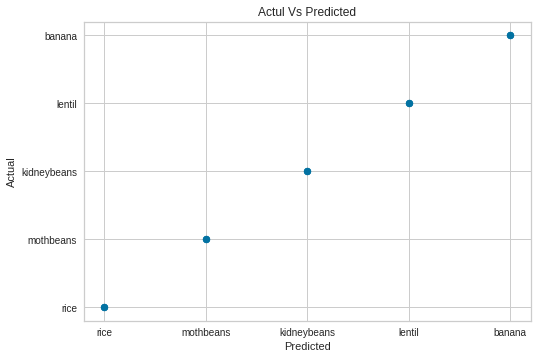

In [ ]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-2]     # Last column
actual = newPredictions.iloc[:,-3]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

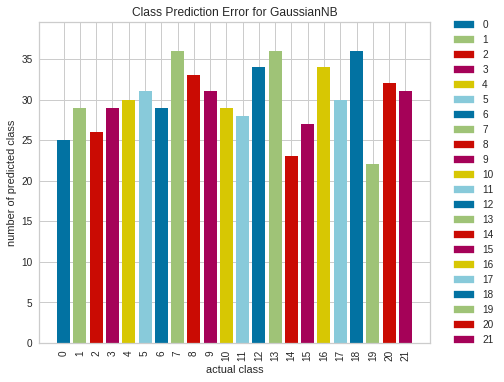

In [ ]:
plot_model(nbModel, plot='error')

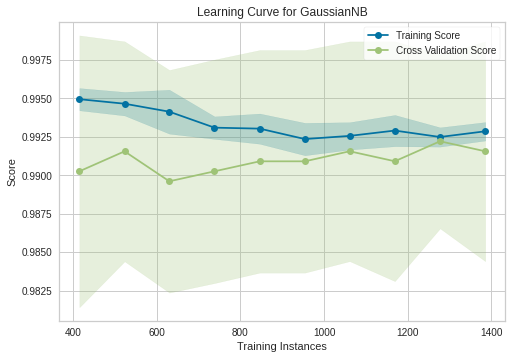

In [ ]:
nbModel = create_model('nb', verbose=True)
plot_model(nbModel, plot='learning')

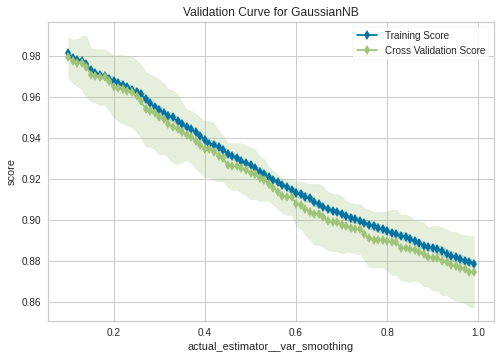

In [ ]:
nbModel = create_model('nb', verbose=True)
plot_model(nbModel, plot='vc')

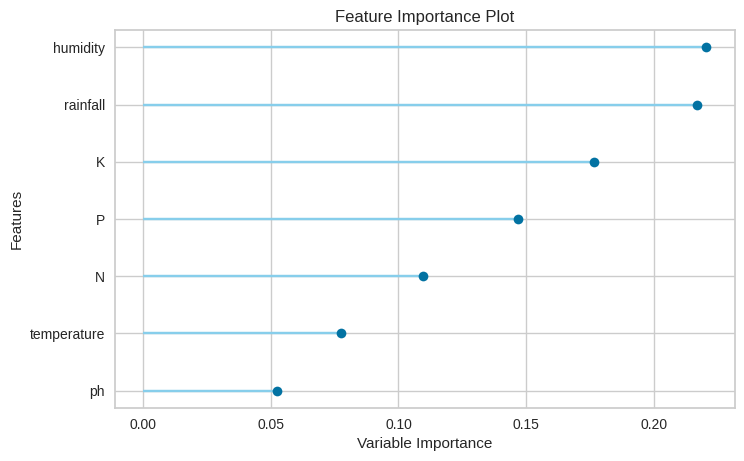

In [ ]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

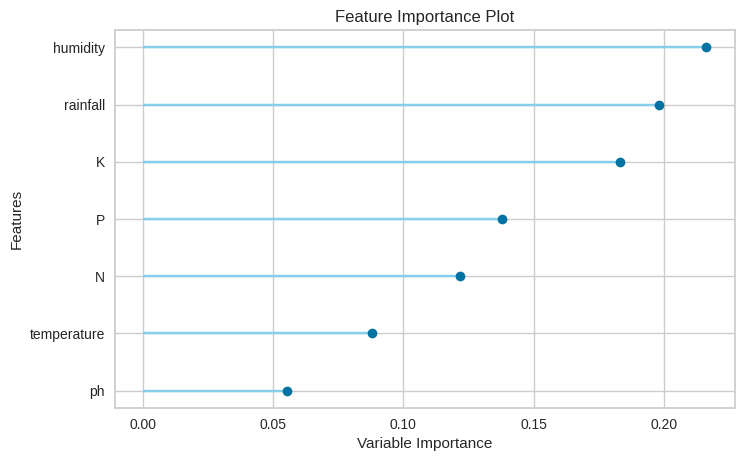

In [ ]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')